- Get a pretty good initial set of bases
- Take out one of the bases 
- What happens to set coverage? (Disruption?)

In [1]:
# Copied over
import read_data
import numpy as np
from matplotlib import pyplot as plt
import copy

from scipy.cluster.vq import vq, kmeans, whiten


In [2]:
(calls, allbases, demands, times, calls_latlong) = read_data.populate_data()

allbases = np.delete(np.array(allbases), 2, 1) # Array of all the bases
demands = np.delete(np.array(demands), 2, 1)   # Array of all the demands
times = np.array(times)                        # Array of all the times
calls_latlong = np.array(calls_latlong)        # Array of location of the calls

In [3]:
# Get the first base
times_copy = copy.deepcopy(times)


# Continually get the min cost row (most optimal base)
# Delete the columns that are covered by this base by r1
# Recalculate the total cost for each base
# Repeat

r1 = 600

numbases = 8
list_bases = []
total_covered = []
for x in range(numbases):
    print("Ambulance Location #%d" %(x+1))
    print(np.shape(times_copy))
    covered = []
    row_num = 0
    for row in times_copy:
        count = 0
        for col in row:
            if col < r1:
                count += 1
#                 print(row_num, count, col, r1)
        covered.append((row_num, count))
        row_num += 1
    
    d = [('index', int), ('covered', int)]
    covered = np.array(covered, d)
    
    min_cost = (np.sort(covered, order='covered', kind='mergesort')[-1])
    #print((np.sort(covered, order='covered', kind='mergesort')))
    print(min_cost)
    print(times_copy[min_cost[0]])
    
    list_bases.append(min_cost[0])
    
    # Delete the columns (demands) that are covered by r1.
    
    primary_covered = [times_copy[min_cost[0]][i] < r1 for i in range(len(times_copy[min_cost[0]]))]
    #print(primary_covered)
    covered_indices = [i for i in range(len(primary_covered)) if primary_covered[i] ]
    print("Covered: ", len(covered_indices), covered_indices)
    total_covered += covered_indices
    
    times_copy = np.delete(times_copy, min_cost[0], axis=0)
    times_copy = np.delete(times_copy, covered_indices, axis=1)
    print("\n")

ind = list_bases
print("Total Covered: " , len(total_covered))

Ambulance Location #1
(969, 100)
(26, 28)
[ 1173.  1047.  1315.  1415.   657.   669.   963.  1013.  1273.  1302.
   601.   684.   714.   938.  1603.  1416.   577.   756.   883.   821.
   381.   429.   947.   780.  1079.  1080.   599.   781.   652.   870.
   491.   471.   598.   578.   379.   409.   229.   147.   333.   427.
   900.   799.  1594.  1551.  1141.  1506.   558.  1196.  1507.  1675.
   427.   360.   791.   990.   582.   666.  1018.   540.   395.   843.
   973.   811.   951.  1279.  1119.   939.   569.   876.   975.  1026.
   574.  1221.  1509.  1167.  1117.  2074.   757.   683.   443.   730.
  1140.   493.  1219.   552.  1430.  1339.   702.   933.   900.   969.
   522.   350.  1479.   299.   822.  1394.  1129.  1269.   813.   796.]
Covered:  28 [16, 20, 21, 26, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 46, 50, 51, 54, 57, 58, 66, 70, 78, 81, 83, 90, 91, 93]


Ambulance Location #2
(968, 72)
(856, 18)
[  804.   681.   954.  1054.   267.   281.   635.   772.  1091.   986.
   545

[26, 856, 159, 748, 684, 824, 598, 954]
(969, 100)
(array([ 0,  1,  2,  3,  4,  5,  8,  9, 11, 12, 16, 17, 18, 19, 20, 21, 22,
       23, 24, 26, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 42, 43, 45, 46,
       47, 50, 51, 52, 54, 57, 58, 59, 60, 64, 65, 66, 67, 69, 70, 73, 74,
       78, 79, 81, 82, 83, 84, 87, 89, 90, 91, 92, 93, 94, 96, 98]),)
Covered 66.0/100


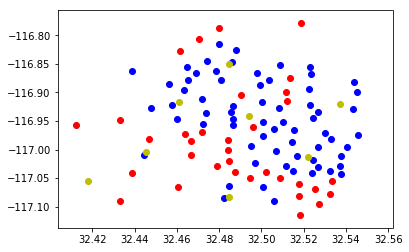

In [4]:
#ind = np.random.randint(0, allbases.shape[0], 8)
print(ind)
print(np.shape(times))

bases = allbases[ind,:]
points = np.delete(allbases, ind, 0)
distance = times[ind,:]
# print((distance))

r1 = 600
r1_coverage = np.any(distance < r1, 0)

r1_covered = np.nonzero(r1_coverage)
print(r1_covered)
c = np.shape(r1_covered)[1]
r1_exposed = np.nonzero(np.logical_not(r1_coverage))
e = np.shape(r1_exposed)[1]
ratio = (c/(c+e))
print("Covered %.1f/100" %(ratio*100))


plt.figure()
plt.scatter(demands[r1_covered,0],demands[r1_covered,1], c='b')
plt.scatter(demands[r1_exposed,0],demands[r1_exposed,1], c='r')
plt.scatter(bases[:,0],bases[:,1], c='y')
plt.show()

Okay, I don't see why there is a discrepancy between the set coverage algorithm which found 92% coverage and the code here that says I'm 66% covered